## 데이터
---

* [고용조사분석시스템](https://survey.keis.or.kr/goms/gomsdownload/List.jsp)

- 대졸자들의 노동시장 진입과 정착 과정에 대한 실증적 자료가 요구됨에 따라  『대졸자직업이동경로조사』를 실시
- 대졸자의 교육과정, 구직활동, 일자리경험, 직업훈련, 자격증, 개인신상정보 및 가계배경 등 노동시장 진입 및 정착에 영향을 줄 수 있는 항목 조사
- GOMS2019.csv
    - shape: (11652, 130)
- GOMS2019_columns.csv
    - shape: (159, 3)


## 0. 환경셋팅
-----
한글 지원이 안되는 문제를 해결하기 위해 한글이 지원되는 폰트를 사용하도록 설정합니다.

In [2]:
# (라이브러리 설치 후 런타임 재시작 필요)
# 터미널에서 하세요
# sudo apt-get update
# sudo apt-get install -y fonts-nanum
# sudo fc-cache -fv
# rm ~/.cache/matplotlib -rf

[sudo] password for user: 
[sudo] password for user: 

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

/home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


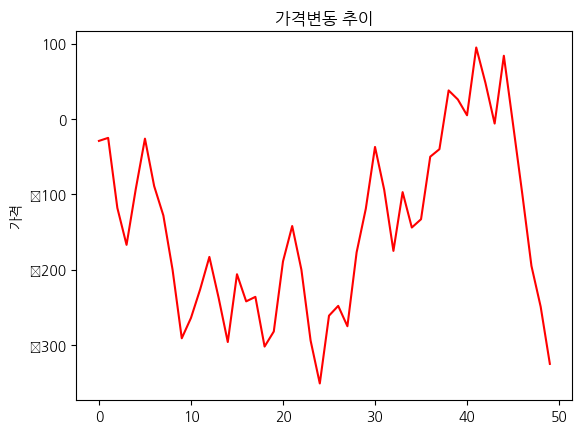

In [11]:


data = np.random.randint(-100, 100, 50).cumsum()
data


plt.plot(range(50), data, 'r')
plt.title('가격변동 추이')
plt.ylabel('가격')
plt.show()

In [1]:
import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

버전:  3.7.1
설치위치:  /home/user/anaconda3/envs/pandas/lib/python3.9/site-packages/matplotlib/__init__.py
설정:  /home/user/.config/matplotlib
캐시:  /home/user/.cache/matplotlib


## 1. 데이터 읽기
---



### 1.1 라이브러리 불러오기
 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

- data : https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019.csv
- columns : https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019_columns.csv

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019.csv')
df_columns = pd.read_csv('https://raw.githubusercontent.com/myoh0623/dataset/main/GOMS2019_columns.csv')

df.shape, df_columns.shape

((11652, 130), (159, 3))

### 1.3 데이터 전처리
----
데이터프레임 `df`의 컬럼명을 변경합니다.

In [15]:
df.columns

Index(['이직여부', 'majorcat', 'school', 'area', 'sex', 'age', 'graduy', 'a001',
       'industry', 'job',
       ...
       'p039', 'p041', 'p043', 'p045', 'r023', 'r024', 'r025', 'r026', 'r027',
       'wt'],
      dtype='object', length=130)

In [16]:
# 컬럼을 넣어주는 작업! 
col_name = df_columns.loc[:, ['columns', 'desc']].values
df.rename(columns = dict(col_name), inplace = True) #dict 가져와서 바꿔주기

In [36]:
df.columns

Index(['이직여부', '전공계열', '학교유형', '학교소재지', '성별', '연령', '졸업년', '현 일자리 시작년', '21',
       '10',
       ...
       '지난 해 소득_만원', '가족에게 경제적 지원을 받고 있는지 여부', '가족에게 경제적 지원을 하고 있는지 여부',
       '군 복무 경험', '전년도 월평균 생활비 지출액', '전년도 월평균 주거비 지출액', '전년도 월평균 공교육비 지출액',
       '전년도 월평균 사교육비 지출액', '생활비 충당 방식', 'wt'],
      dtype='object', length=130)

## 2. 데이터 시각화
----

In [17]:
# Matplotlib 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

### 2.1 월평균 근로소득 분포
- 월평균 근로소득의 분포를 히스토그램으로 그리고 평균과 중앙값을 선으로 표시하십시오.

In [64]:
df_salary =df[df["월평균 근로소득_만원"]<=1000]["월평균 근로소득_만원"]

In [58]:
df_salary

0        112
1        180
2        180
3        260
4        240
        ... 
11647    120
11648    200
11649    150
11650    800
11651     90
Name: 월평균 근로소득_만원, Length: 11641, dtype: int64

In [53]:
df_salary.mean() #평균


이직여부                            1.785328
전공계열                            3.801563
학교유형                            1.817627
학교소재지                           6.872605
성별                              1.418177
연령                             26.874338
졸업년                          2017.816081
현 일자리 시작년                    2017.833004
21                             10.861438
10                              3.239756
기업체 종사자 수                       4.674942
사업체 종사자 수                       4.349626
사업체 위치(국내/국외)                   1.000000
사업체 위치(시도)                      6.141998
교통수단                            3.214157
출근시간                            0.218710
사업체 형태                          2.351173
종사상 지위                          1.257882
정규 근로일                          5.044670
주당 정규 근로시간                     40.708616
주당 초과 근로시간                      3.128941
월평균 휴일 근로                       0.537411
월평균 근로소득_만원                   244.051800
초임 월평균 근로소득_만원                220.721673
만족도-임금          

In [22]:
df_salary.median() #중앙값

230.0

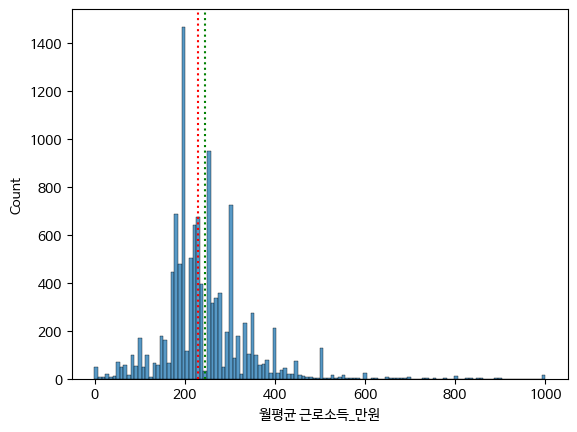

In [65]:
sns.histplot(df_salary)
plt.axvline(df_salary.mean(), ls=":", color="g")
plt.axvline(df_salary.median(), ls=":", color="r")

### 2.2 전공계열에 따른 월평균 근로소득 분포
- 전공계열에 따른 월평균 근로소득의 분포를 바이올린 플롯으로 그리고, 이직여부를 구분하여 그리십시오.(sns.violinplot)

<Axes: xlabel='전공계열', ylabel='월평균 근로소득_만원'>

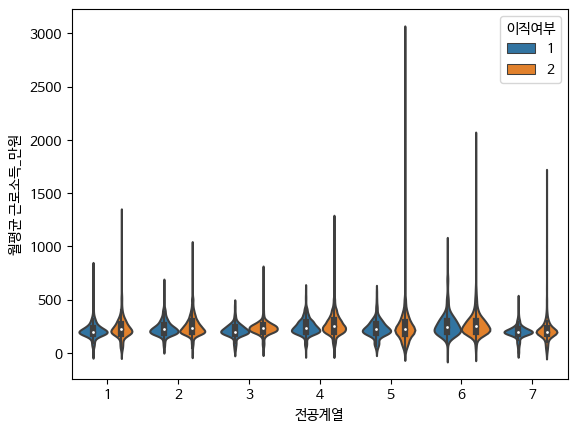

In [63]:
sns.violinplot(x = "전공계열", y="월평균 근로소득_만원", data=df, hue="이직여부") #hue가 뭐지?!

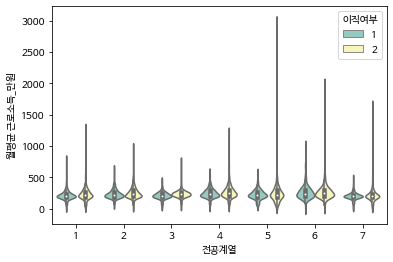

### 2.3 주당 정규 근로시간에 따른 월평균 근로소득 분포
- 주당 정규 근로시간에 따른 월평균 근로소득의 분포를 산점도로 표현하십시오.

<Axes: xlabel='주당 정규 근로시간', ylabel='월평균 근로소득_만원'>

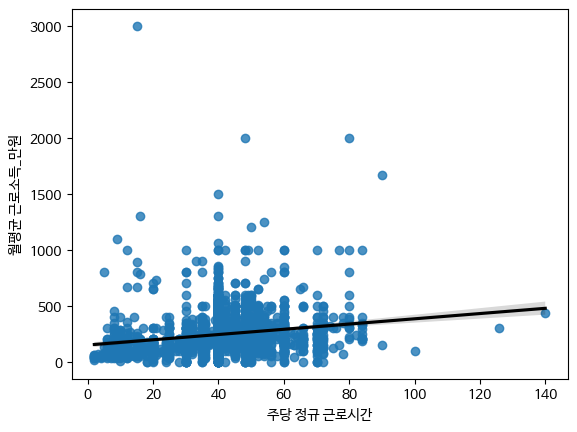

In [31]:
sns.regplot(data= df, x="주당 정규 근로시간", y="월평균 근로소득_만원", line_kws={"color":"black"})

### 2.4 월평균 근로소득에 영향을 미치는 변수
- '월평균 근로소득_만원', '주당 정규 근로시간', '졸업 평점', '전반적 만족도(직장)'의 쌍별 관계를 pairplot을 이용해 시각화하고, 이직여부를 구분하여 그리십시오.

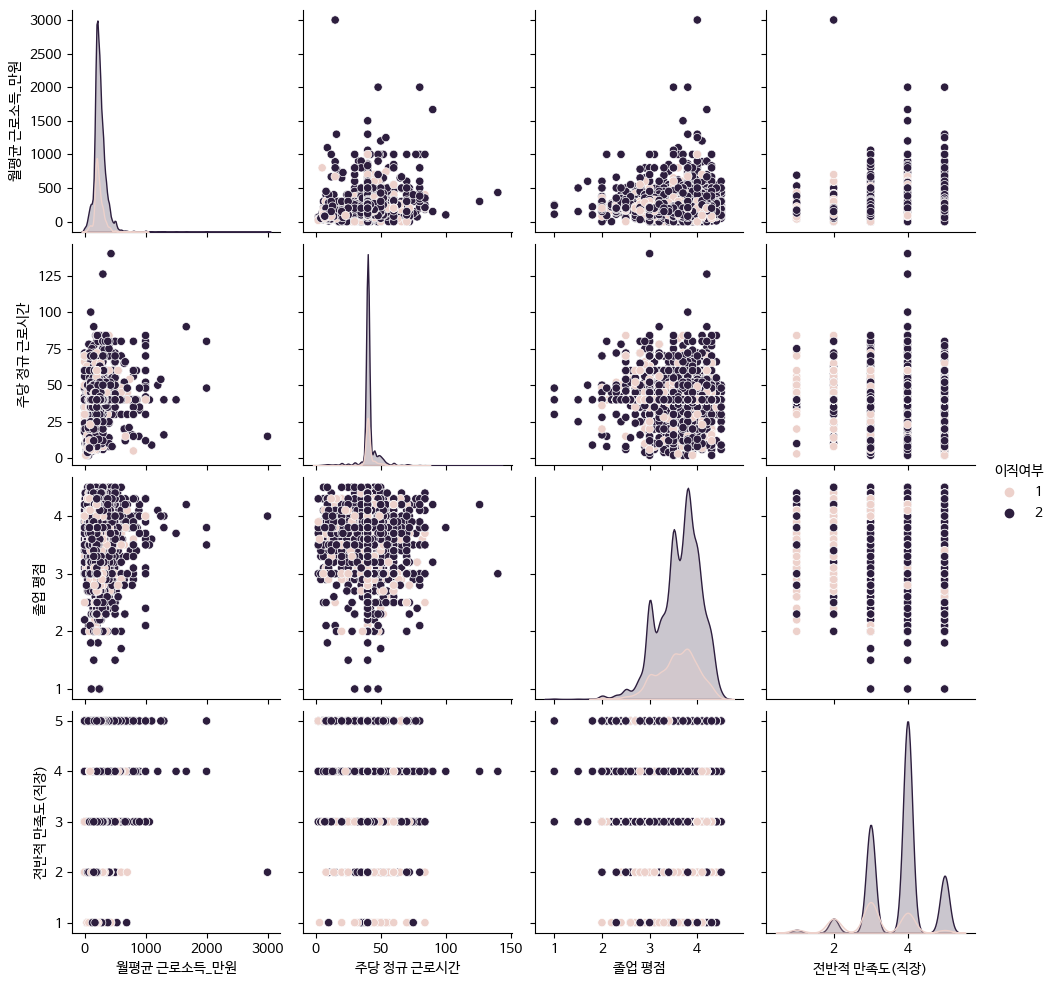

In [34]:
columns=["월평균 근로소득_만원","주당 정규 근로시간","졸업 평점","전반적 만족도(직장)"]

sns.pairplot(data=df, x_vars=columns,y_vars=columns, hue="이직여부")

### 2.5 전공계열의 분포
- 전공계열의 분포를 막대그래프와 파이차트로 각각 표현하십시오.

In [41]:
df_columns[df_columns.desc=="전공계열"]

,columns,desc,label
0,majorcat,전공계열,"인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7"


<Axes: xlabel='전공계열', ylabel='count'>

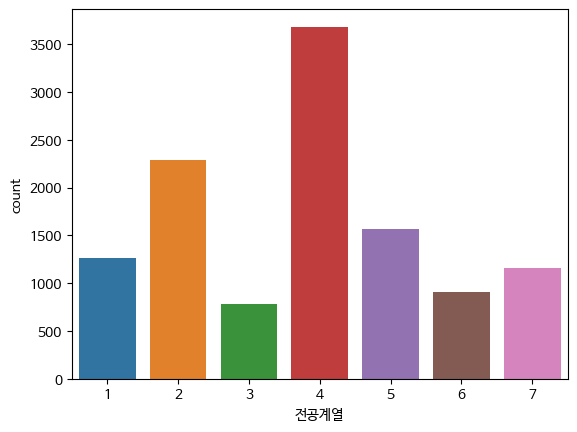

In [40]:
sns.countplot(x=df["전공계열"])

### 2.6 이직여부의 분포
- 이직여부의 분포를 막대그래프와 파이차트로 각각 표현하십시오.

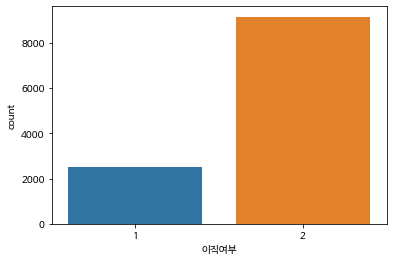

In [ ]:
sns.countplot(x=df["이직여부"])

In [42]:
df_count= df["이직여부"].value_counts()

In [43]:
df_count # 1 = 이직 / 2 = 노이직

2    9153
1    2499
Name: 이직여부, dtype: int64

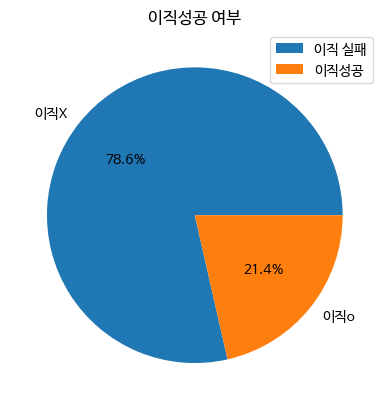

In [45]:
plt.pie(df_count, labels=["이직X", "이직o"], autopct='%.1f%%') #autopct='%.1f%%'는 % 나타내는거
plt.title("이직성공 여부")
plt.legend(["이직 실패", "이직성공"])

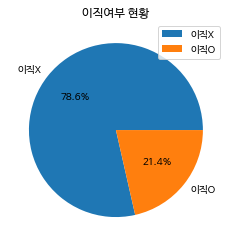